In [1]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#### This is how you import deep_autoviml
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.28
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="auto",
		project_name="deep_autoviml", keras_options={}, model_options={}, 
		save_model_flag=True, use_my_model='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
datapath = 'C:/Users/Ram/Documents/Ram/Data_Sets/'
filename = 'titanic_train.csv'
train_datafile = datapath+filename
project_name = "titanic"
target = 'Survived'
sep = ','

In [3]:
# load dataset
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head(1)

(838, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# split into input and output elements
train, test = train_test_split(train, test_size=0.2, random_state=99)
#filename = 'taxi_test.csv'
url = datapath + filename
#test = pd.read_csv(url, header=0, sep=sep)
print(train.shape, test.shape)
test.head(1)

(670, 12) (168, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [5]:
keras_model_type =  "fast" ## always try "fast" first, then "fast2", "auto". If NLP, use "BERT" and if image, use "image"
model_options = {'nlp_char_limit':10, 'cat_feat_cross_flag':True, 'max_trials': 5}
keras_options = {"patience":10,'class_weight':True, "early_stopping": False, "epochs": 100}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    epochs : 100
    class_weight : True
    early_stopping : False
Using following model_options given as input:
    cat_feat_cross_flag : True
    nlp_char_limit : 10
    max_trials : 5

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical C

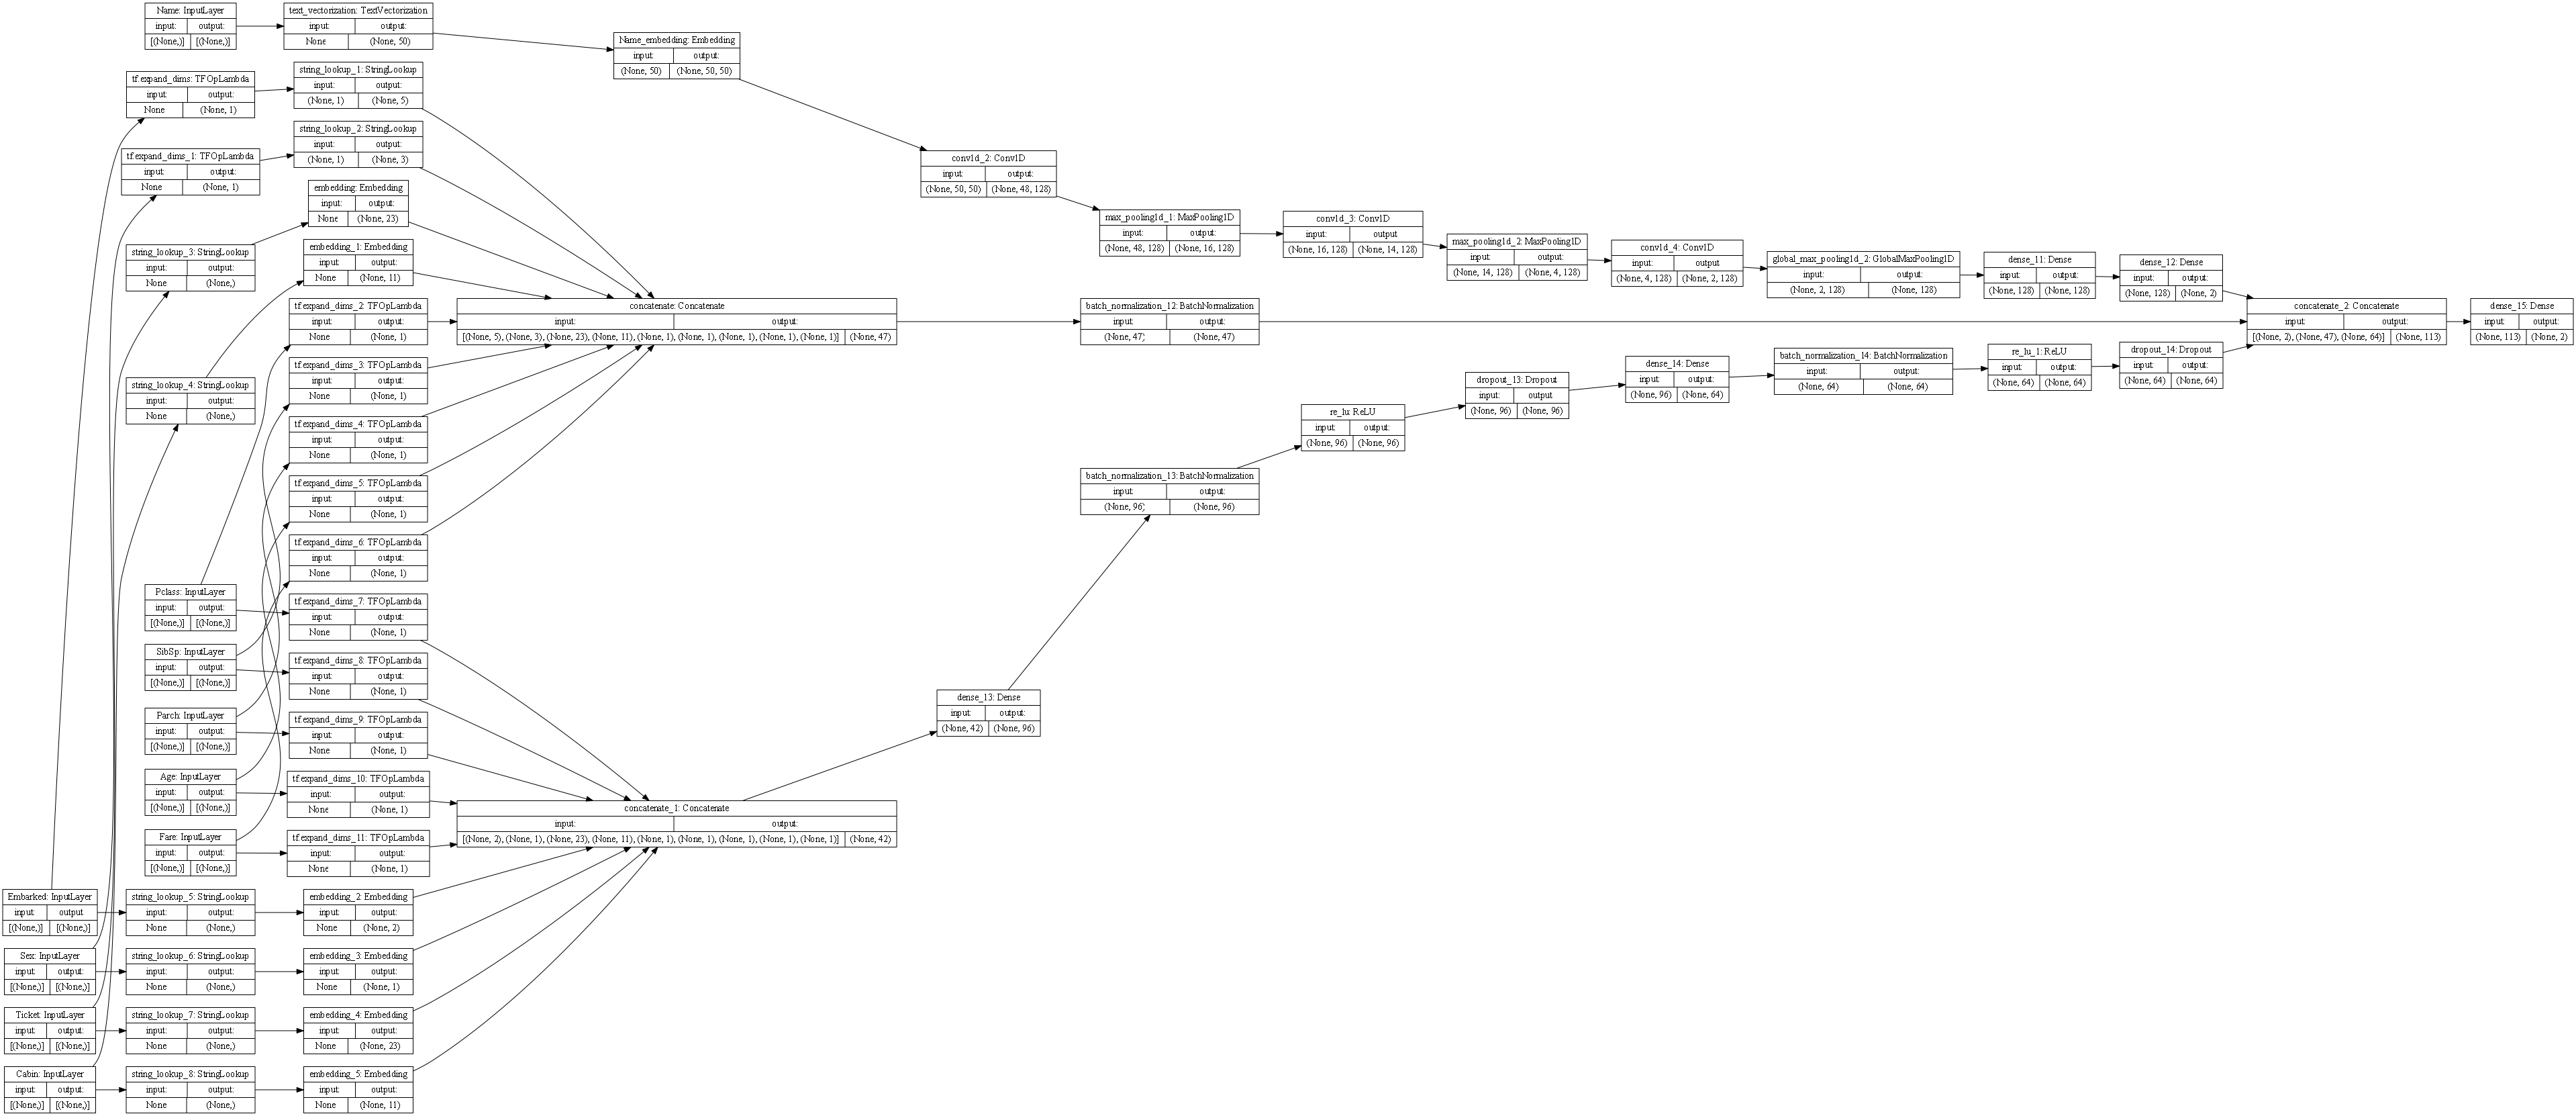

Model plot saved in file: deep_autoviml_titanic_fast_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a fast model option...
    class_weights: {0: 1.0, 1: 1.3137254901960784}
    original datasize = 670, initial batchsize = 33
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Using optimizer = Adam obj
    Tensorboard log directory can be found at: deep_autoviml\mylogs
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
    number of epochs = 100, steps per epoch = 10
    Splitting train into two: train and validation data
    Splitting validation into two: valid and heldout data
 Shuffle size = 100000
Training fast model now. This will take time...
Epoch 1/100
10/10

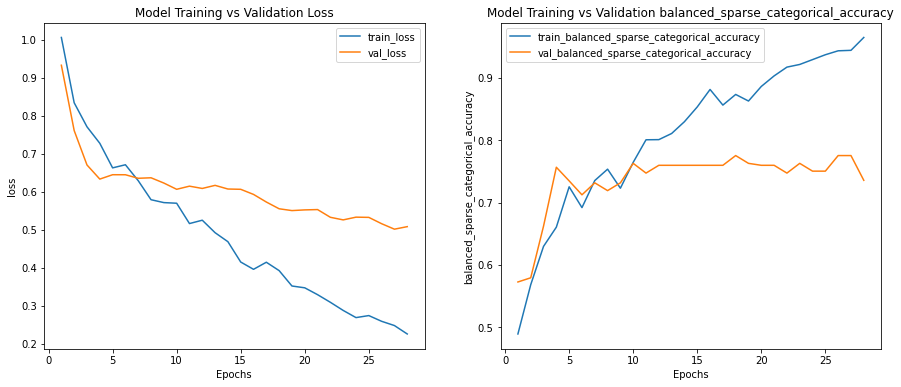


###########################################################
         Held-out test data set Results:


Binary Class Model Metrics Report
#####################################################
    Accuracy          = 72.7%
    Balanced Accuracy = 73.1%
    Precision         = 66.7%
    Average Precision = 72.7%
    Recall            = 75.9%
    F1 Score          = 71.0%
    ROC AUC           = 73.2%
#####################################################

Training full train dataset. This will take time...
    completed. Time taken (in mins) = 0


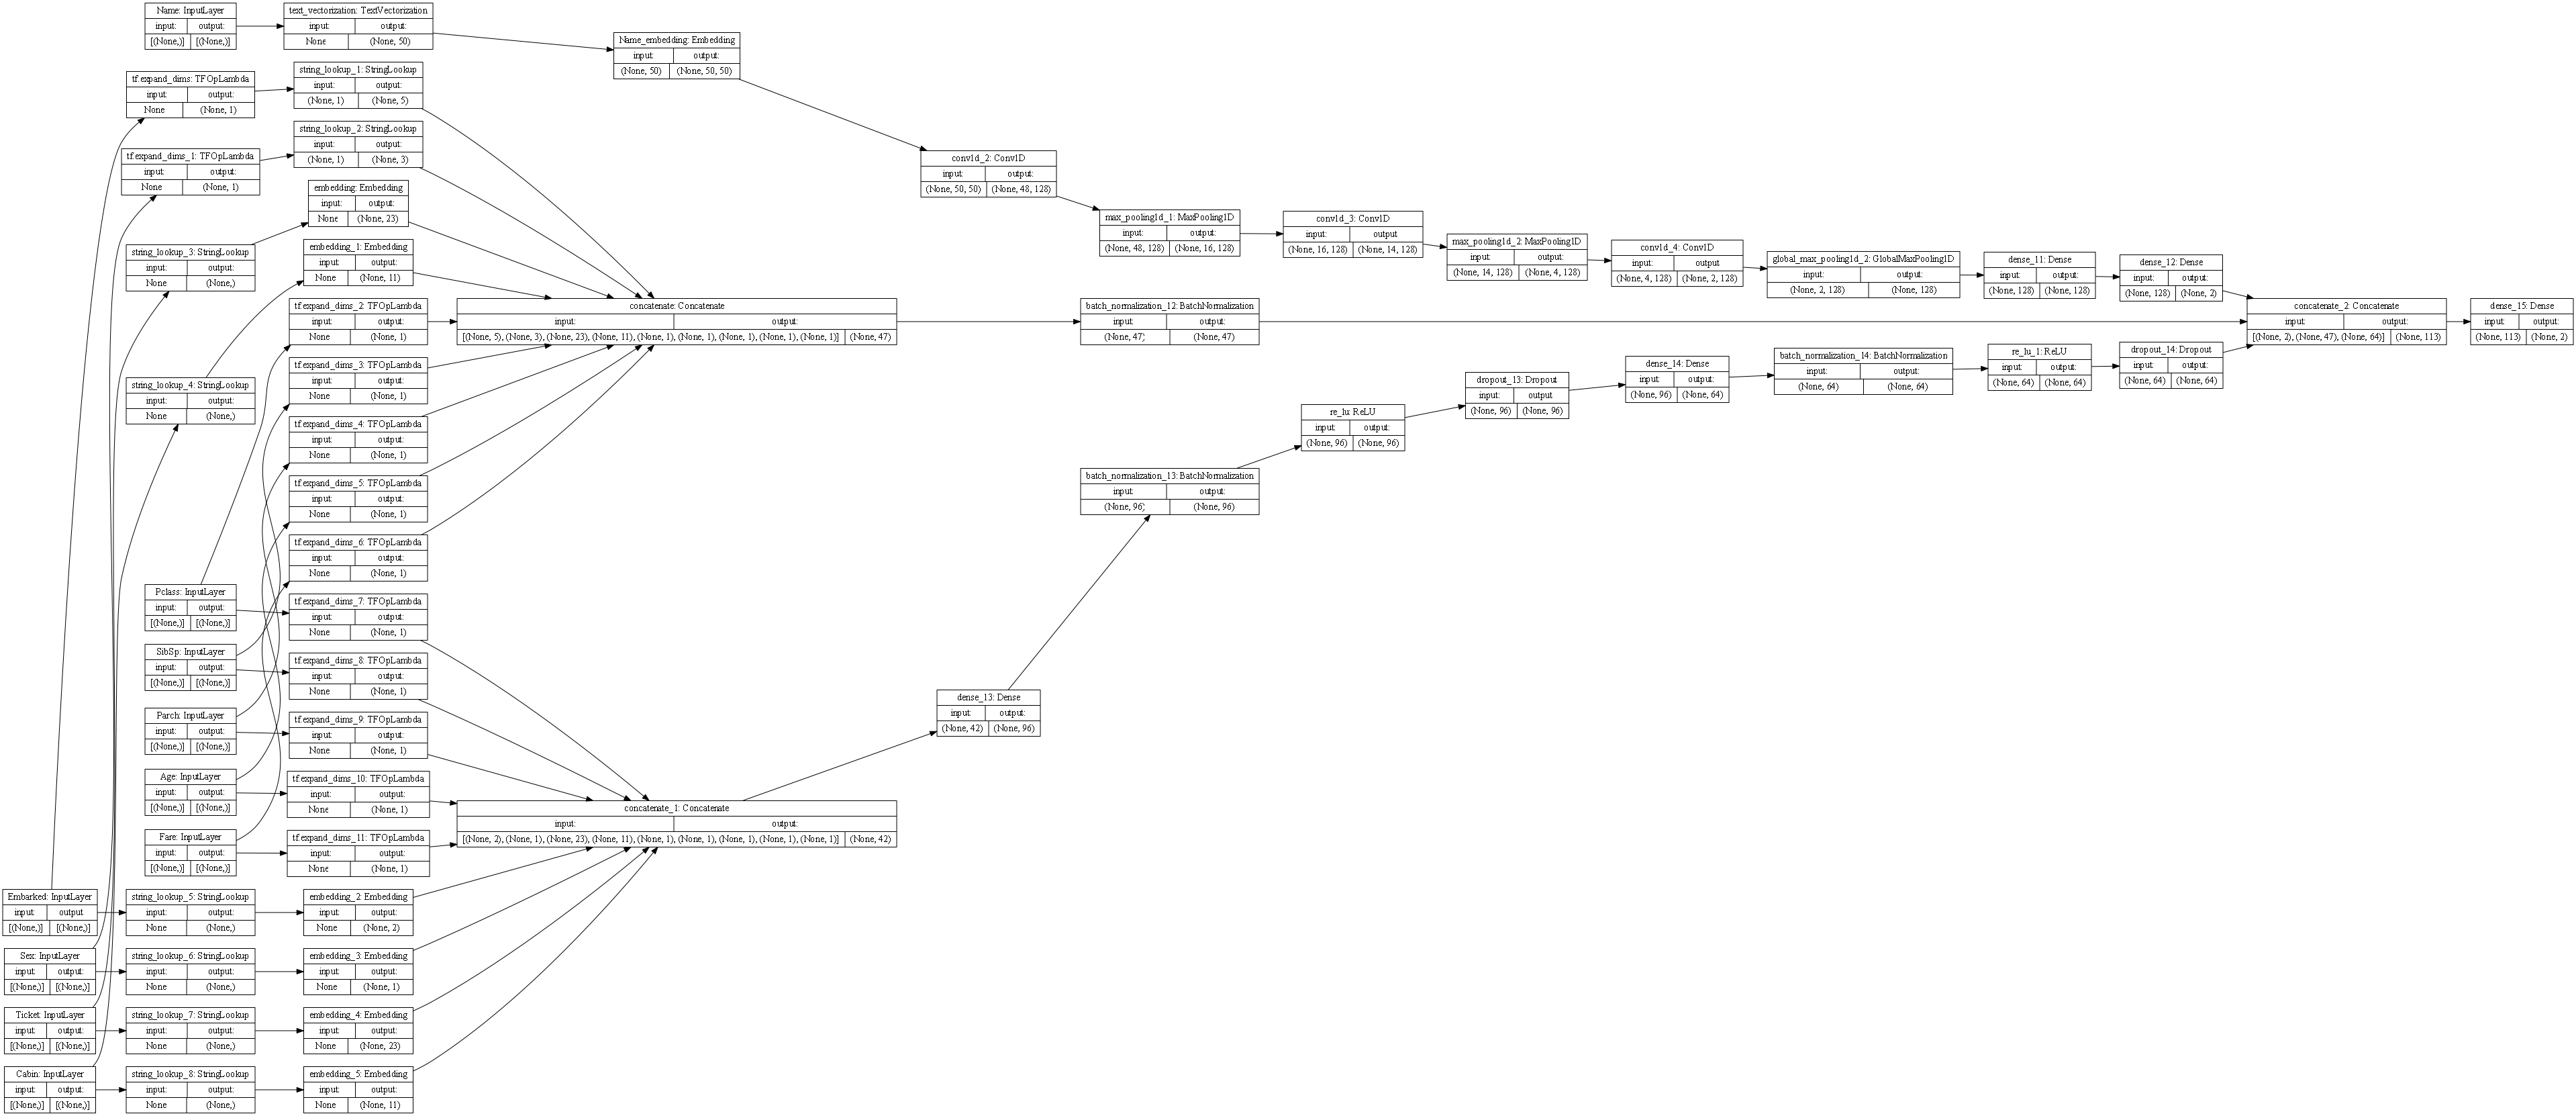

Model plot saved in file: deep_autoviml_titanic_fast_model_after.png


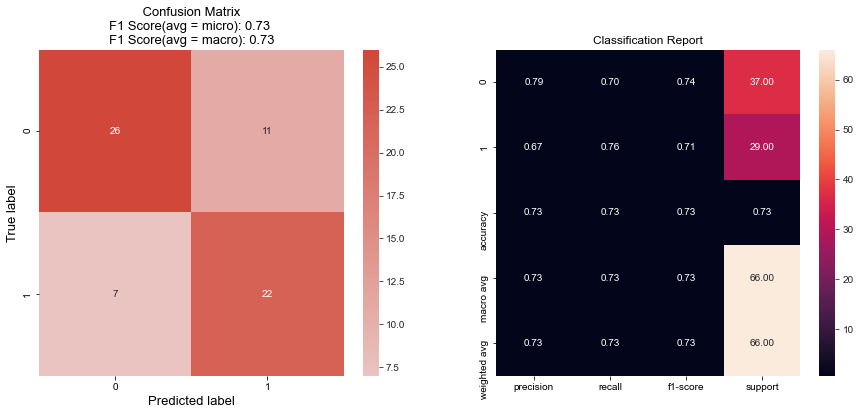

In [6]:
output = deepauto.fit(train, target, keras_model_type,project_name=project_name, keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=1)

In [7]:
model = output[0]
cat_vocab_dict = output[1]

In [8]:
y_preds = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x000001ABC95C8760> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 168
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
        2 variable(s) to be removed since they were ID or low-information variables
    Dropping ['PassengerId'] columns from dataset...
    test data loaded successfully.
test data size =  168 , batch_size =  33
    number of steps needed to predict: 6
    Sample predictions before inverse_transform: [1 0 1 1 1]
    Sample predictions after transform: [1 0 1 1 1]
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [9]:
y_test = test[target].values
y_test.shape

(168,)

In [10]:
y_preds[0].shape

(168, 2)

In [11]:
from deep_autoviml.utilities.utilities import print_classification_model_stats, print_regression_model_stats

In [12]:
#print_regression_model_stats(y_test, y_preds[0])
print_classification_model_stats(y_test, y_preds[1])

Balanced Accuracy = 74.65%
Confusion Matrix:
[[92  9]
 [28 39]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       101
           1       0.81      0.58      0.68        67

    accuracy                           0.78       168
   macro avg       0.79      0.75      0.76       168
weighted avg       0.78      0.78      0.77       168

#####################################################################


0.7464903206738585